<a href="https://colab.research.google.com/github/JLDaniel77/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/LS_DS3_123_Reshape_data_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

    100% |████████████████████████████████| 215kB 25.8MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [3]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [5]:
table1.describe().T

,count,mean,std,min,25%,50%,75%,max
treatmenta,2.0,9.500000,9.192388,3.0,6.25,9.5,12.75,16.0
treatmentb,3.0,4.666667,5.507571,1.0,1.50,2.0,6.50,11.0


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [4]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [6]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [10]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [11]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [14]:
table1.reset_index()

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [18]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


# Extra challenge

what if we wanted to change a and b to 0 and 1?

In [19]:
tidy['trt'].replace('a', 0).replace('b', 1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [20]:
tidy['trt'].map({'a': 0, 'b': 1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [22]:
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [23]:
tidy['trt'].apply(lambda x: ord(x) - ord('a'))

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [83]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [85]:
table2.T

,treatmenta,treatmentb
John Smith,NaN,2.0
Jane Doe,16.0,11.0
Mary Johnson,3.0,1.0


In [88]:
tidy2 = table2.T.reset_index().melt(id_vars='index')

tidy2 = tidy2.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')

tidy2

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [89]:
# I perfer the table above, but here's how to change indext to 'name' column
tidy2.set_index('name')

,trt,result
name,,
John Smith,a,NaN
Jane Doe,a,16.0
Mary Johnson,a,3.0
John Smith,b,2.0
Jane Doe,b,11.0
Mary Johnson,b,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [24]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [25]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [28]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [90]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [91]:
tidy2

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [92]:
tidy2.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a "variable" is something that will be assigned a role in the plot.

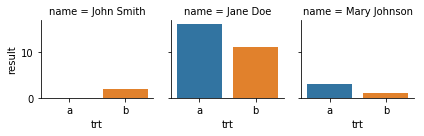

In [39]:
sns.catplot(x='trt', y='result', col='name',
           kind='bar', data=tidy, height=2);

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [34]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-27 17:02:55--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.133.197
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.133.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  96.3MB/s    in 2.0s    

2019-03-27 17:02:58 (96.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [35]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [36]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

# This will load the entire dataset:
# order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
#                             pd.read_csv('order_products__train.csv')])

# This will sample the dataset to reduce ram usage:
order_products = pd.concat([
    pd.read_csv('order_products__prior.csv')
      .sample(frac=0.5),
    
    pd.read_csv('order_products__train.csv')
      .sample(frac=0.5)
])

orders = pd.read_csv('orders.csv')



## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [66]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [68]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [69]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [70]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

need product_name from products and
order_hour_of_day from orders
will have to use order_products to link 
products with orders

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

In [72]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (16909552, 4), (3421083, 7), (16909552, 4))

In [73]:
merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,49629,14
1,8803,Fully Husked & Trimmed Super Sweet Corn,49629,14
2,19508,Corn Tortillas,49629,14
3,22362,Original Rice Krispies Treats,49629,14
4,23194,Milk Chocolate Kisses,49629,14


In [0]:
# what condition will filter 'merged' to just the 2 products
# that we care about?

condition = ((merged['product_name'] == 'Half Baked Frozen Yogurt') |
              (merged['product_name'] == 'Half And Half Ultra Pasteurized'))

# ...to this:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

In [75]:
merged.shape, subset.shape

((16909552, 4), (3004, 4))

In [76]:
subset.sample(n=5)

,product_id,product_name,order_id,order_hour_of_day
16517421,30668,Half Baked Frozen Yogurt,631384,16
4240995,30668,Half Baked Frozen Yogurt,2087345,13
11896859,9292,Half And Half Ultra Pasteurized,646261,8
14149883,30668,Half Baked Frozen Yogurt,3084844,14
13597656,30668,Half Baked Frozen Yogurt,636988,20


## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name'] == 'Half Baked Frozen Yogurt']
cream = subset[subset['product_name'] == 'Half And Half Ultra Pasteurized']

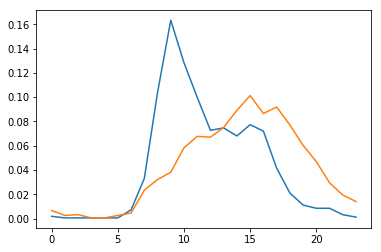

In [79]:
(cream['order_hour_of_day']
  .value_counts(normalize=True)
  .sort_index().plot())
(froyo['order_hour_of_day']
  .value_counts(normalize=True)
  .sort_index().plot());

### 2. crosstab

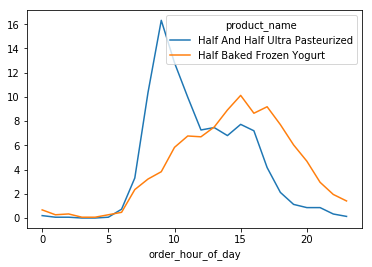

In [80]:
(pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'],
           normalize='columns') * 100).plot();

### 3. pivot_table

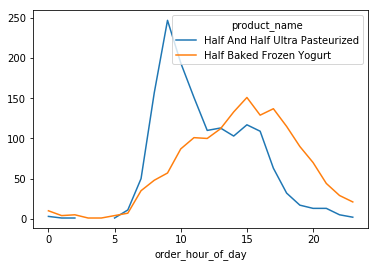

In [81]:
subset.pivot_table(index='order_hour_of_day',
                  columns='product_name',
                  values='order_id',
                  aggfunc=len).plot();

### 4. melt

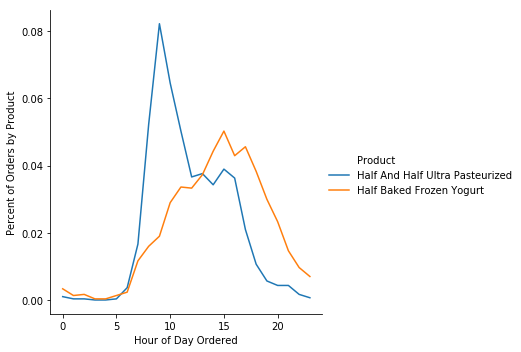

In [82]:
table = pd.crosstab(subset['order_hour_of_day'],
                   subset['product_name'],
                   normalize=True)

melted = (table
 .reset_index()
 .melt(id_vars='order_hour_of_day')
  .rename(columns={
      'order_hour_of_day': 'Hour of Day Ordered',
      'product_name': 'Product',
      'value': 'Percent of Orders by Product'
  }))

sns.relplot(x='Hour of Day Ordered',
            y='Percent of Orders by Product',
            hue='Product',
            data=melted,
            kind='line');

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [94]:
flights.columns.tolist()

['year', 'month', 'passengers']

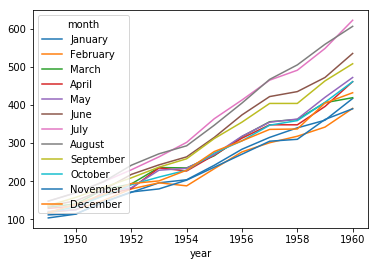

In [110]:
flights.pivot_table(index='year', columns='month', values='passengers').plot();

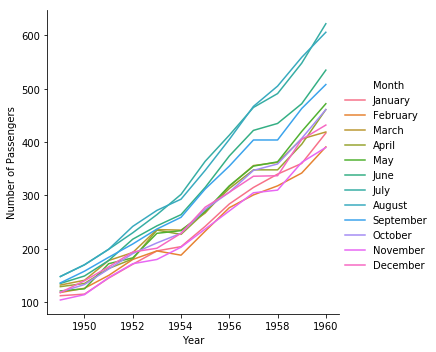

In [115]:
flights_renamed = flights.rename(columns={
                  'year': 'Year', 
                  'month': 'Month',
                  'passengers': 'Number of Passengers'
})

sns.relplot(x='Year',
            y='Number of Passengers',
            hue='Month',
            data=flights_renamed,
            kind='line');

# Create a seaborn heatmap

In [121]:
# Create an array of month & their respective passengers
month = ((np.asarray(flights['month'])).reshape(12, 12))
passengers = ((np.asarray(flights['passengers'])).reshape(12, 12))

print(month)
print(passengers)

[['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September' 'October' 'November' 'December']
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
  'September

In [118]:
piv_table = flights.pivot_table(index='month', columns='year', values='passengers')
piv_table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [0]:
# Create an array to annotate the heatmap
labels = (np.asarray(["{0} \n {1}".format(m, p)
                     for m, p in zip(month.flatten(),
                                       passengers.flatten())])
         ).reshape(12, 12)

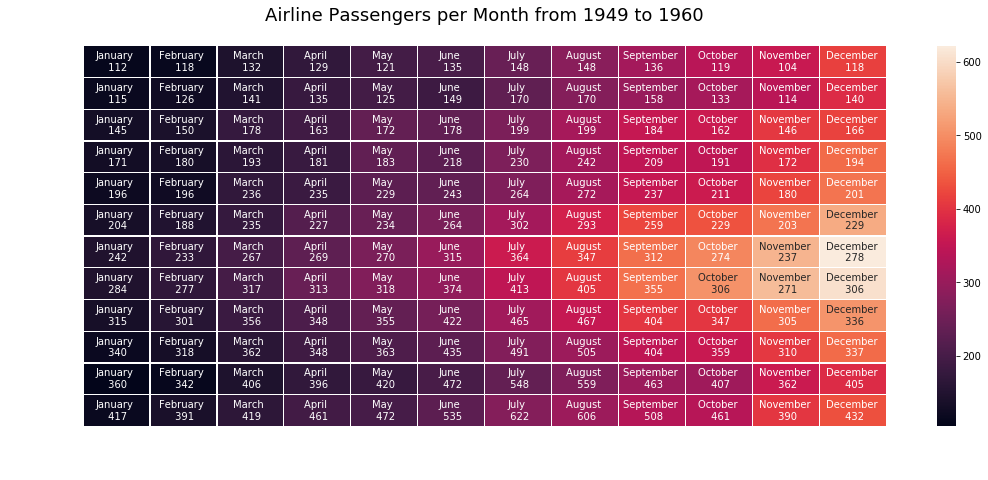

In [130]:
import matplotlib.pyplot as plt

# define the plot
fig, ax = plt.subplots(figsize=(18, 7))

# add title to the heat map
title = 'Airline Passengers per Month from 1949 to 1960'

# set the font size and the distance fo the title from the plot
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([0.5, 1.05])

# hide ticks for x and y axis
ax.set_xticks([])
ax.set_yticks([])

# remove the axes
ax.axis('off')

sns.heatmap(piv_table, annot=labels, fmt='', linewidths=0.30, ax=ax)
plt.show()

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

Get the most recent order for each user in Instacart's dataset. This is a useful baseline when predicting a user's next order.

In [96]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [97]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [98]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

**From order_products:**
- order_id
- product_id

**From orders:**
- user_id
- order_id
- order_number

**From products:**
- product_id
- product_name

In [0]:
order_merged = (orders[['user_id', 'order_id', 'order_number']]
                .merge(order_products[['order_id', 'product_id']])
                .merge(products[['product_id', 'product_name']]))



In [107]:
products.shape, order_products.shape, orders.shape, order_merged.shape

((49688, 4), (16909552, 4), (3421083, 7), (16909552, 5))

In [108]:
order_merged.head()

,user_id,order_id,order_number,product_id,product_name
0,1,2539329,1,26088,Aged White Cheddar Popcorn
1,352,1214741,1,26088,Aged White Cheddar Popcorn
2,363,3169664,9,26088,Aged White Cheddar Popcorn
3,423,3272366,7,26088,Aged White Cheddar Popcorn
4,712,219467,5,26088,Aged White Cheddar Popcorn


In [131]:
# Attempt 1: not what I want
order_merged.groupby('product_name')['order_number'].nlargest(1)

product_name                                                             
#2 Coffee Filters                                                11801996     92
#2 Cone White Coffee Filters                                     16845675     12
#2 Mechanical Pencils                                            16775772     41
#4 Natural Brown Coffee Filters                                  15850440    100
& Go! Hazelnut Spread + Pretzel Sticks                           13046219     89
(70% Juice!) Mountain Raspberry Juice Squeeze                    16826814     25
+Energy Black Cherry Vegetable & Fruit Juice                     16641032     31
.5\" Waterproof Tape                                             16897636     13
0 Calorie Acai Raspberry Water Beverage                          15384433     33
0 Calorie Fuji Apple Pear Water Beverage                         9890168      48
0 Calorie Strawberry Dragonfruit Water Beverage                  15710692     65
0% Fat Black Cherry Greek Yogurt y 